In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [90]:
df = pd.read_excel("the-number-of-public-transport-passengers-by-year-and-city_team2.xlsx")
df = df.drop([0,1,2,3,4])
df = df.drop('Unnamed: 0', axis=1)
row = df.iloc[0]#The iloc() method can be used to select rows and columns from a DataFrame by index label. 
col_mapp = {
    'Unnamed: 1': row.iloc[0],
    'Unnamed: 2': row.iloc[1],
    'Unnamed: 3': row.iloc[2],
    'Unnamed: 4': row.iloc[3],
    'Unnamed: 5': row.iloc[4],
    'Unnamed: 6': row.iloc[5],
    'Unnamed: 7': row.iloc[6],
    'Unnamed: 8': row.iloc[7]
}
df =df.set_axis(list(col_mapp.values()), axis=1)
df = df.drop(5)
df.head(5)

,المدينة,اجمالي عدد ركاب النقل العام خلال السنة(2016),اجمالي عدد ركاب النقل العام خلال السنة(2017),اجمالي عدد ركاب النقل العام خلال السنة(2018),اجمالي عدد ركاب النقل العام خلال السنة(2019),اجمالي عدد ركاب النقل العام خلال السنة(2020),اجمالي عدد ركاب النقل العام خلال السنة(2021),اجمالي عدد ركاب النقل العام خلال السنة(2022)
6,الرياض,1409890.5,1690540,5082110.928571,8142886,3911449,5813692,6017436
7,جدة,853839,1161330.5,2769925.944444,4033215,2287532,3992553,4401483
8,المدينة المنورة,1370139.9,1902893.8,1496747.079365,1287501,203355,0,287539
9,الدمام,650363,729328.5,444746.4,267401,73683.333333,0,54849


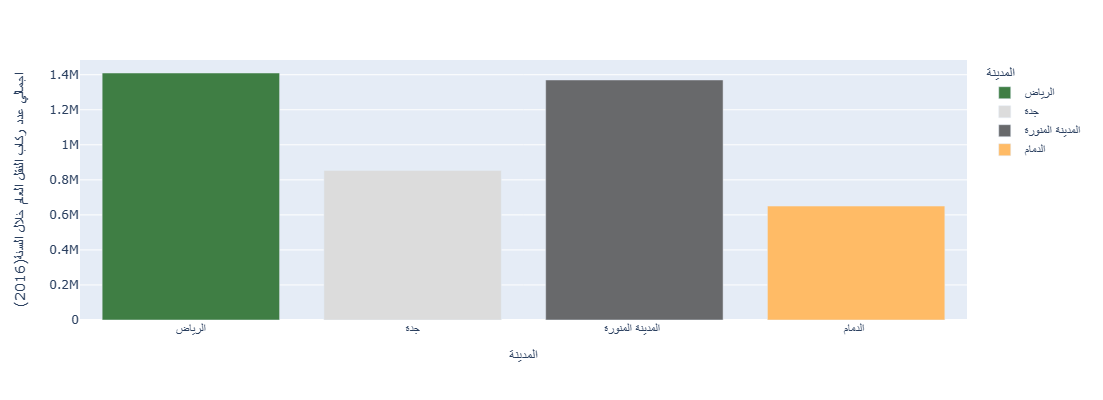

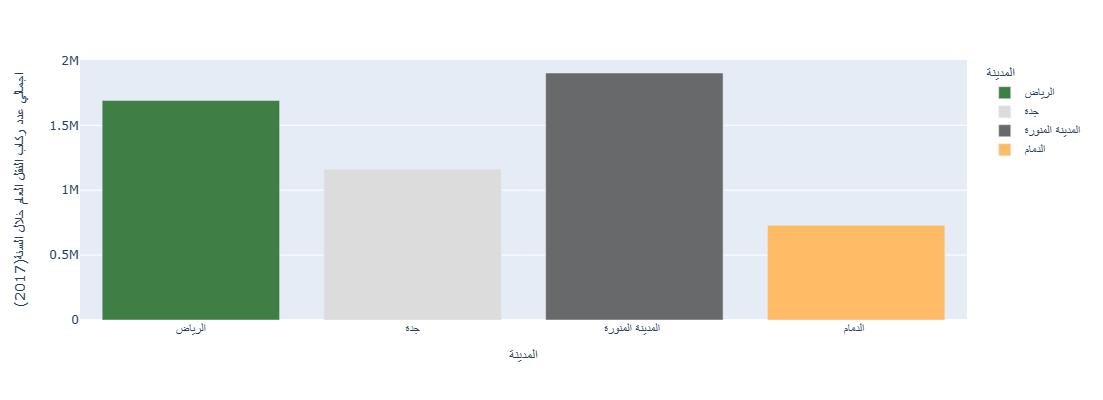

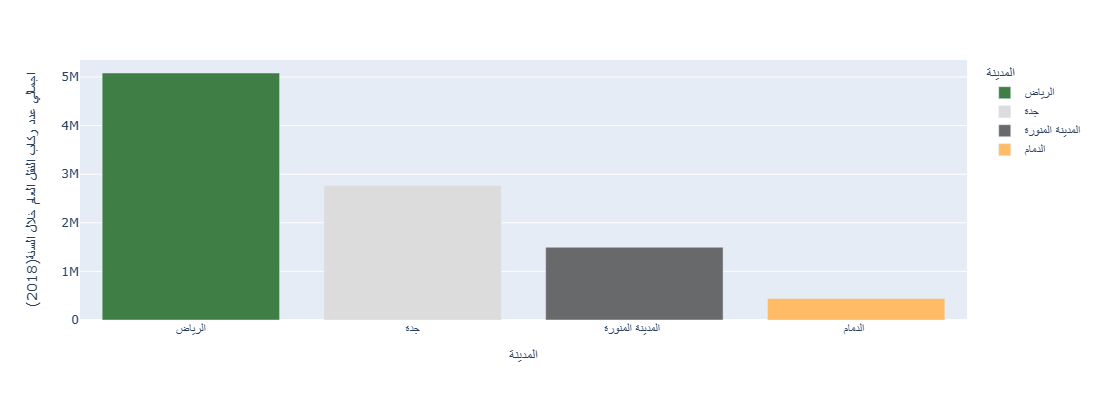

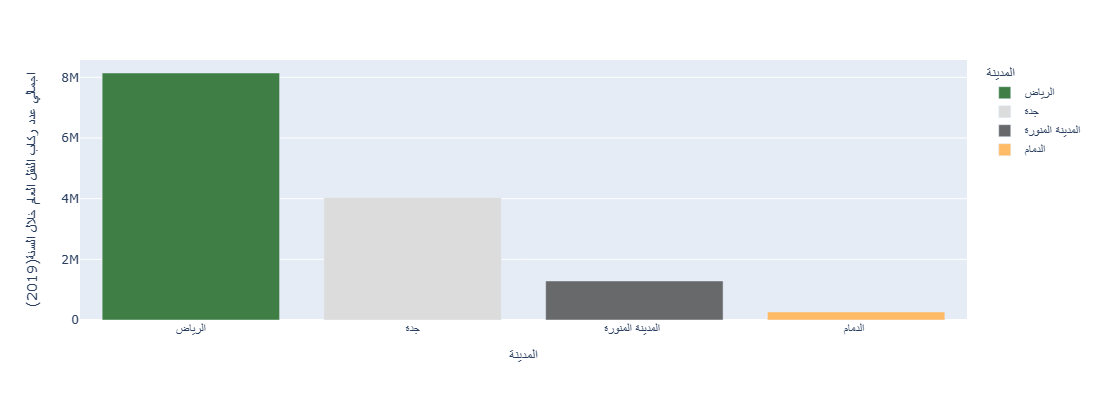

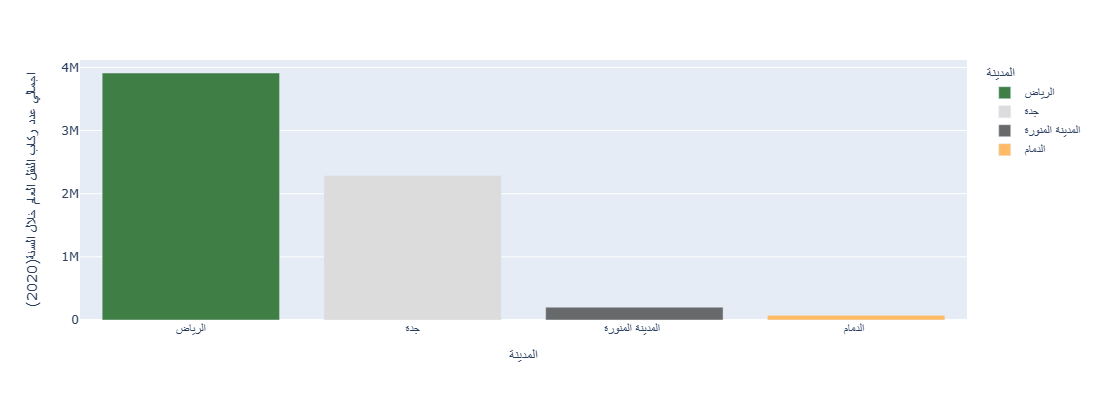

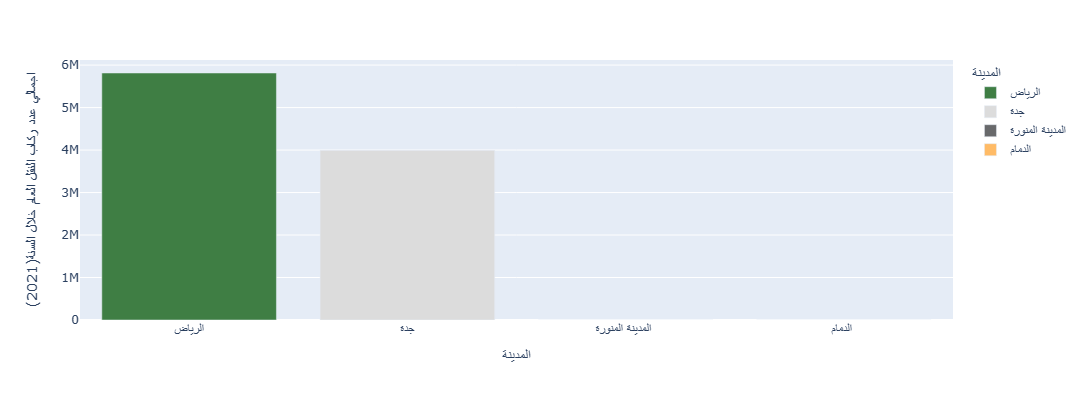

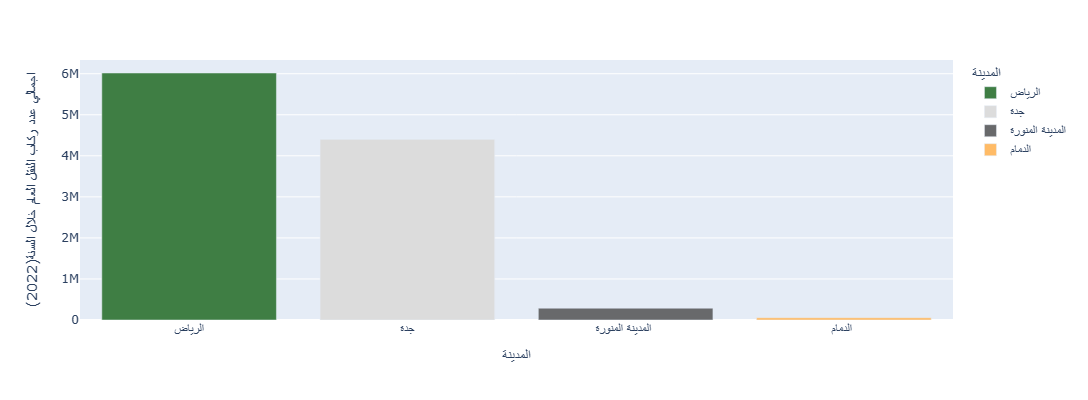

In [131]:
colors = ['rgb(63,126,68)','rgb(220, 220, 220)',  'rgb(104, 105, 107)', 'rgb(255, 187, 102)']
sns.set_style("whitegrid")
fig1 = px.bar(df, x=df.columns[0], y=df.columns[1], color=df.columns[0],height=400,color_discrete_sequence=colors)
fig2 = px.bar(df, x=df.columns[0], y=df.columns[2], color=df.columns[0],height=400,color_discrete_sequence=colors)
fig3 = px.bar(df, x=df.columns[0], y=df.columns[3], color=df.columns[0],height=400,color_discrete_sequence=colors)
fig4 = px.bar(df, x=df.columns[0], y=df.columns[4], color=df.columns[0],height=400,color_discrete_sequence=colors)
fig5 = px.bar(df, x=df.columns[0], y=df.columns[5], color=df.columns[0],height=400,color_discrete_sequence=colors)
fig6 = px.bar(df, x=df.columns[0], y=df.columns[6], color=df.columns[0],height=400,color_discrete_sequence=colors)
fig7 = px.bar(df, x=df.columns[0], y=df.columns[7], color=df.columns[0],height=400,color_discrete_sequence=colors)
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()
fig7.show()

In [21]:
df1 = pd.read_csv("used_car_cleaned.csv")
df1.head(20)

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price
0,Hyundai,Tucson,83491.0,Automatic,2018,64000.0
1,Chevrolet,Trailblazer,222000.0,Automatic,2009,20000.0
2,Great,Wall,0.0,Automatic,2022,135000.0
3,Ford,Fusion,178000.0,Automatic,2012,23000.0
4,Mitsubishi,Attrage,10500.0,Automatic,2020,32000.0
5,Honda,HR-V,1000.0,Automatic,2021,80000.0
6,Hyundai,Accent,68000.0,Automatic,2016,24000.0
7,Ford,Explorer,49000.0,Automatic,2015,69000.0
8,Nissan,Sentra,149000.0,CVT,2014,23000.0
9,Ford,Explorer,49000.0,Automatic,2015,69000.0


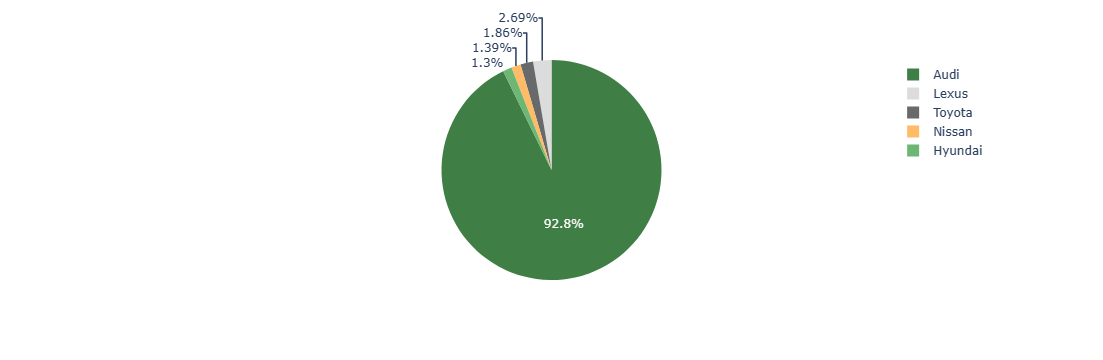

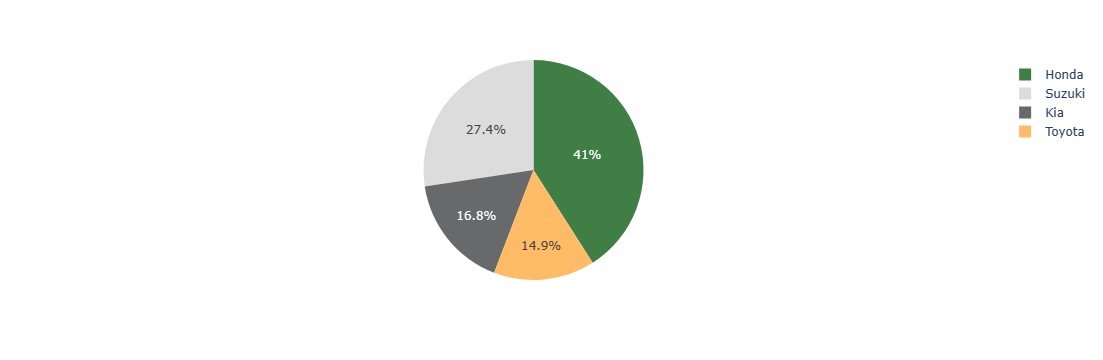

In [129]:
colors = ['rgb(63,126,68)','rgb(220, 220, 220)',  'rgb(104, 105, 107)', 'rgb(255, 187, 102)']
top = df1.sort_values('car_driven', ascending=False)
top=top.head()
top_p = df1.sort_values('car_price', ascending=False)
top_p=top_p.head()
figg = px.pie(top, values=top["car_driven"], names=top["car_brand"],color_discrete_sequence=colors)
figg1 = px.pie(top_p, values=top_p["car_price"], names=top_p["car_brand"],color_discrete_sequence=colors)
figg1.show()
figg.show()

In [55]:
df2 = pd.read_csv("Population estimates by gender nationality and region 2010 - 2022_data.csv")
df2['Population estimates'] = df2['Population estimates'].str.replace(',', '')
df2["Population estimates"]=df2["Population estimates"].astype('int')
#df2=df2["year"].astype('int')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Region                676 non-null    object
 1   Year                  676 non-null    object
 2   Gender                676 non-null    object
 3   Nationality           676 non-null    object
 4   Population estimates  676 non-null    int32 
dtypes: int32(1), object(4)
memory usage: 23.9+ KB


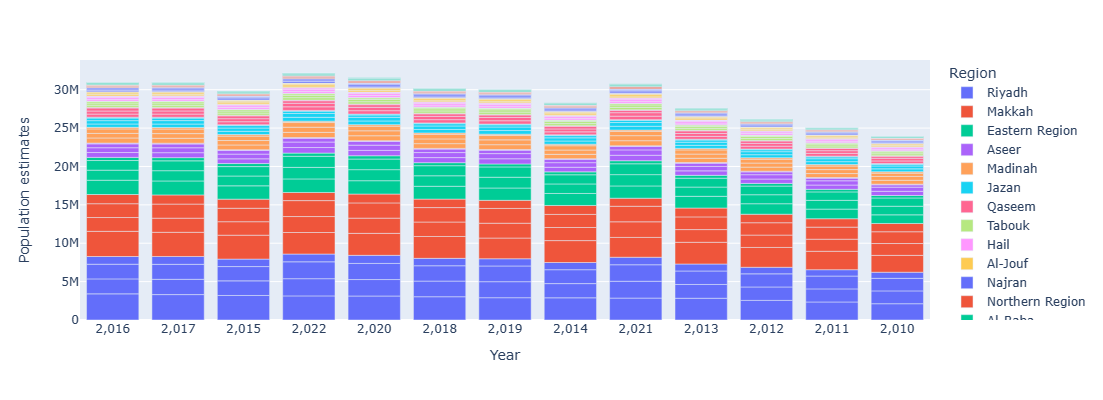

In [71]:
top = df2.sort_values('Population estimates', ascending=False)
#top=top.value_counts()

figzz = px.bar(top, x="Year", y="Population estimates",
             hover_data="Region", color='Region',
             
             labels={'year':'Year', 'pop':'population of Saudi Arabia'}, height=400)
figzz.show()
#top.head(20)

In [74]:
df4 = pd.read_csv("bus_ridership_New_York_City_Transit.csv")
df.head(20)

,Year,Average Weekday,Average Saturday,Average Sunday,Average Weekend,Annual Total
0,2016,2038119,1221299,957427,2178725,638413113
1,2017,1923993,1168978,923694,2092672,602620356
2,2018,1811605,1122626,868057,1990683,569361220
3,2019,1770394,1108809,847931,1956740,557036504
4,2020,980374,671835,532002,1203837,316768454
5,2021,984865,646302,482090,1128392,311893583


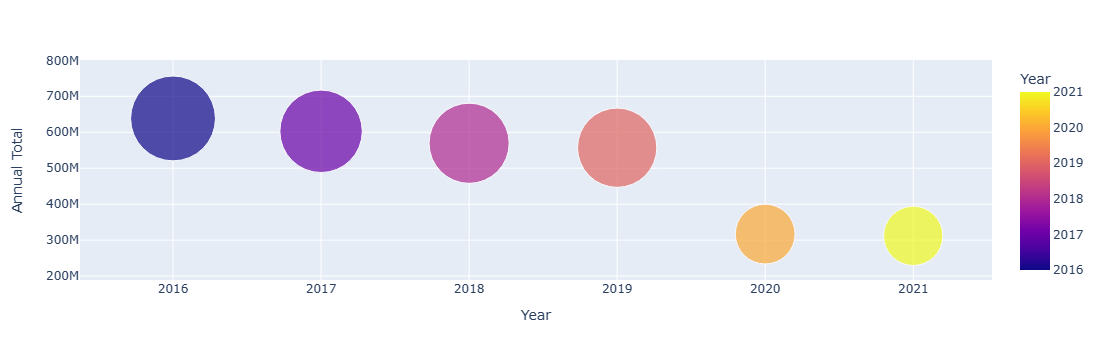

In [133]:
fig = px.scatter(df4, x='Year', y='Annual Total',
        size='Annual Total', color='Year', hover_name='Year', size_max=60)
fig.show()